In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,50755,None,None,85794.922729
2020-06-13,50756,None,None,79685.242128
2020-06-14,50757,None,None,74019.007751
2020-06-15,50758,None,None,68680.660952
2020-06-16,50759,None,None,63923.282165
...,...,...,...,...
2021-04-21,51068,None,None,23453.149937
2021-04-22,51069,None,None,22351.428558
2021-04-23,51070,None,None,21336.214199


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-25_2021-04-25-17-29.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-24_2021-04-24-16-17.pickle


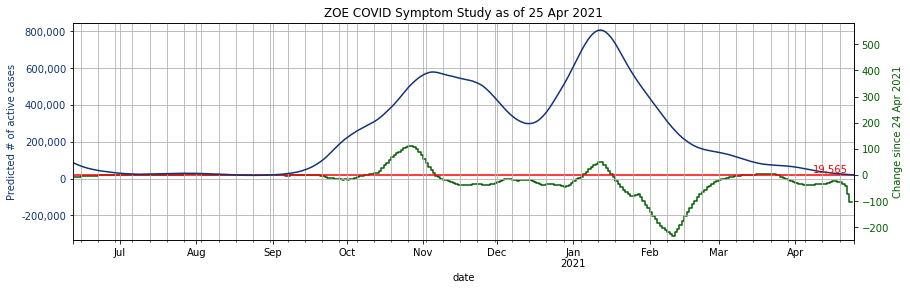

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

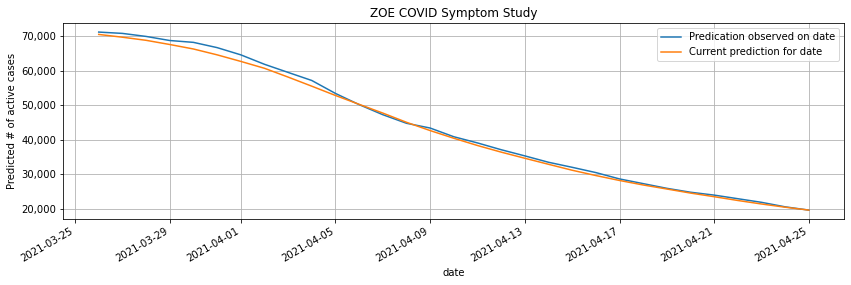

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-25_2021-04-25-17-29.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
15,"Kingston upon Hull, City of",E06000010,0.547034
373,North Ayrshire,S12000021,0.312803
325,Glasgow City,S12000046,0.258104
260,Coventry,E08000026,0.257156
248,Rugby,E07000220,0.250936
143,Blaby,E07000129,0.250092
276,Liverpool,E08000012,0.222218
333,Flintshire,W06000005,0.217161
210,Broxtowe,E07000172,0.216278
25,Rutland,E06000017,0.198982
